<a href="https://colab.research.google.com/github/AnamayaSaraogi/Loan-Prediction-Machine-Learning/blob/main/loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the file
path ='/content/drive/My Drive/loan_data_set.csv'
data= pd.read_csv(path)

In [ ]:
data.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# About the dataset

In [ ]:
#rows and columns
data.shape

(614, 13)

In [ ]:
#inforrmation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#null values of each column
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
#removing Loan_ID as it doesn't comtribute to the analysis
data.drop(columns=['Loan_ID'],inplace=True)

# Missing Values

In [ ]:
#gender - filling missing places with mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [ ]:
#married - filling missing values with mode
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

In [ ]:
#dependents - filling missig places with -0.5
data.dropna(subset=['Dependents'], inplace=True)

In [ ]:
# Check summary statistics for ApplicantIncome by Self_Employed
print(data.groupby('Self_Employed')['ApplicantIncome'].describe())


               count         mean          std    min      25%     50%  \
Self_Employed                                                            
No             487.0  5045.786448  5736.430141  150.0  2776.50  3692.0   
Yes             80.0  7437.362500  5946.109008  674.0  3420.75  5909.0   

                   75%      max  
Self_Employed                    
No             5267.50  81000.0  
Yes            9407.75  39147.0  


In [ ]:
#Self_employed
def impute_self_employed(row):
    if pd.isnull(row['Self_Employed']):
        if row['ApplicantIncome'] > 5000:  # Adjust threshold based on your analysis
            return 'No'  # Likely not self-employed
        else:
            return 'Yes'  # Likely self-employed
    else:
        return row['Self_Employed']

# Apply the conditional imputation
data['Self_Employed'] = data.apply(impute_self_employed, axis=1)

In [ ]:
#Loan Amount - dropping rows without loan amount as it is crucial for analysis
data.dropna(subset=['LoanAmount'], inplace=True)

In [ ]:
#loan amount term - filling missig places with -0.5
data.dropna(subset=['Loan_Amount_Term'], inplace=True)

In [ ]:
#credit history - filling missing values with mode
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [ ]:
#null values of each column
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# Visualiasation

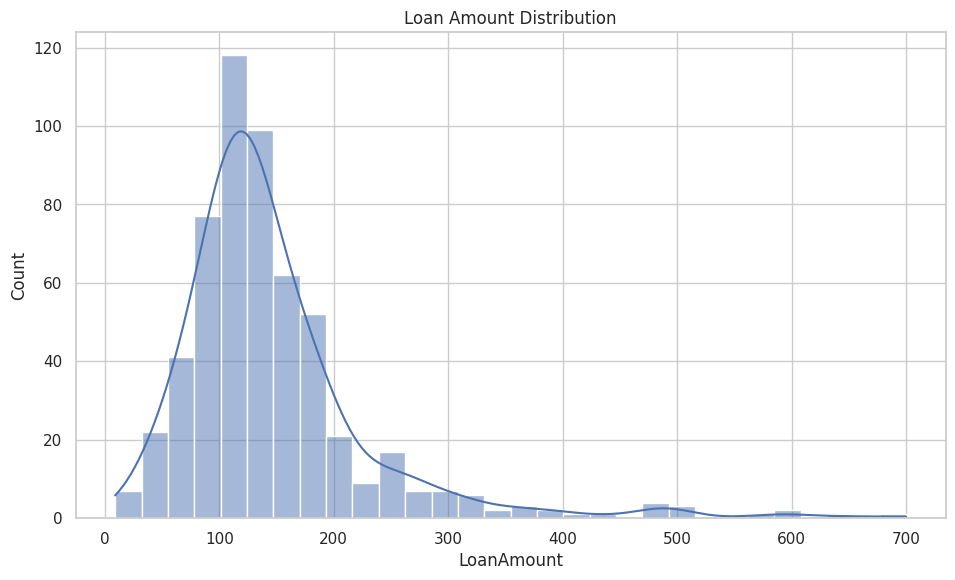

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['LoanAmount'], bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.show()

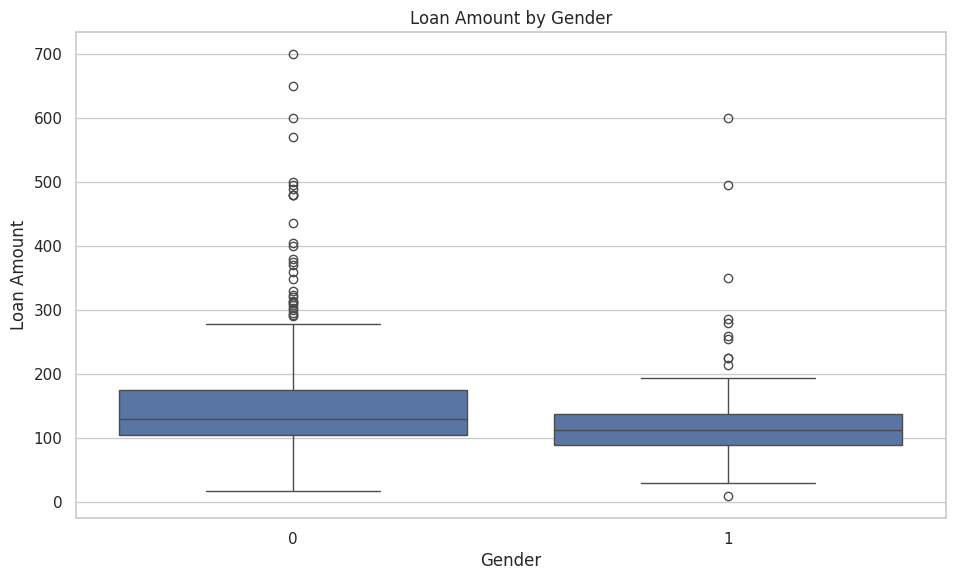

In [ ]:
sns.set(style="whitegrid")

# 1. Boxplot for Loan Amount by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='LoanAmount', data=data)
plt.title('Loan Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
plt.show()


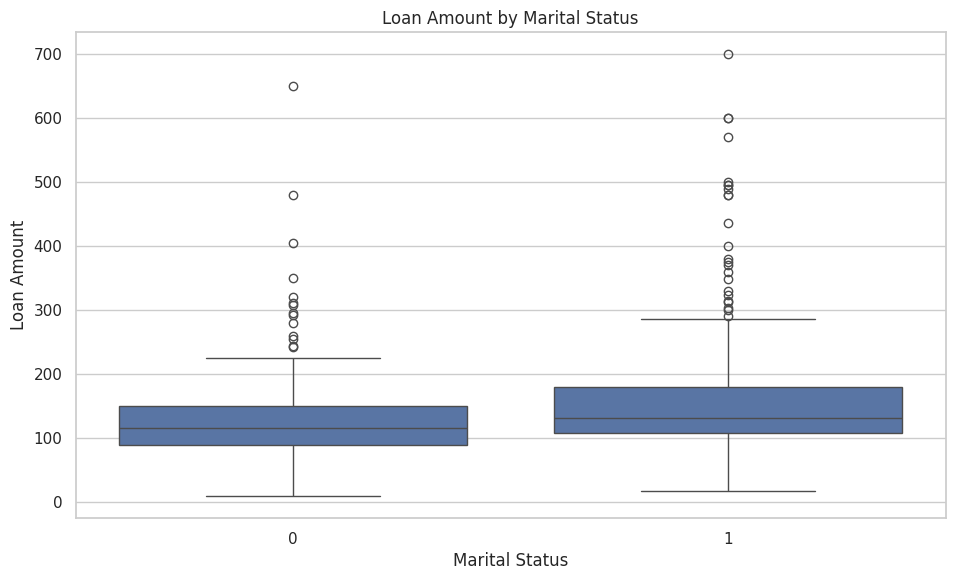

In [ ]:

# 2. Boxplot for Loan Amount by Marital Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Married', y='LoanAmount', data=data)
plt.title('Loan Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Loan Amount')
plt.show()


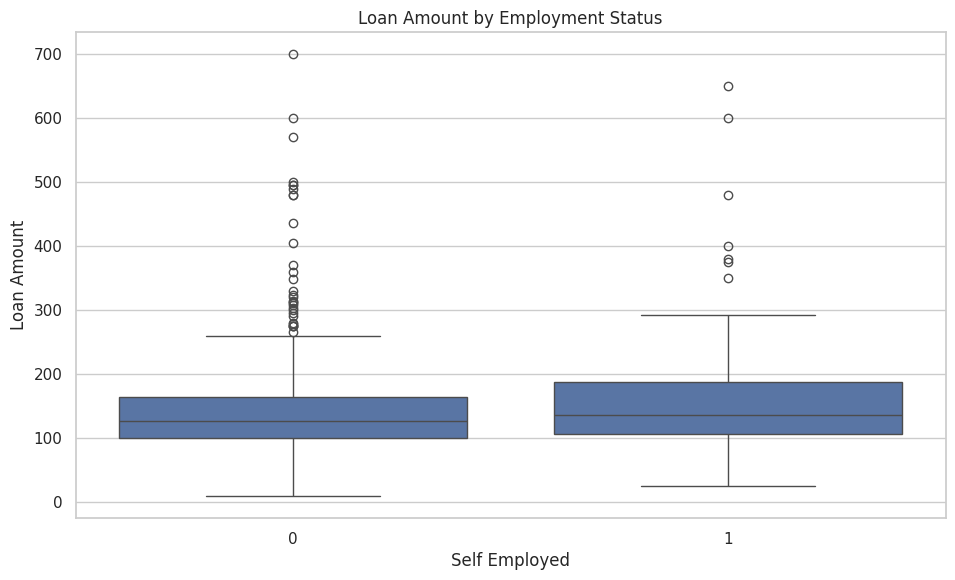

In [ ]:

# 3. Boxplot for Loan Amount by Employment Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Self_Employed', y='LoanAmount', data=data)
plt.title('Loan Amount by Employment Status')
plt.xlabel('Self Employed')
plt.ylabel('Loan Amount')
plt.show()

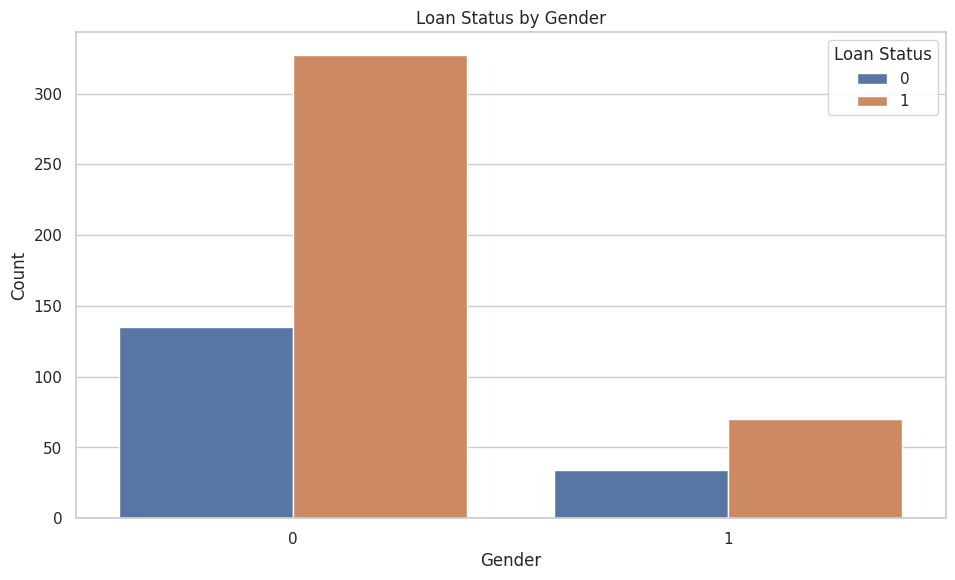

In [ ]:
# 4. Countplot for Loan Status by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=data)
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

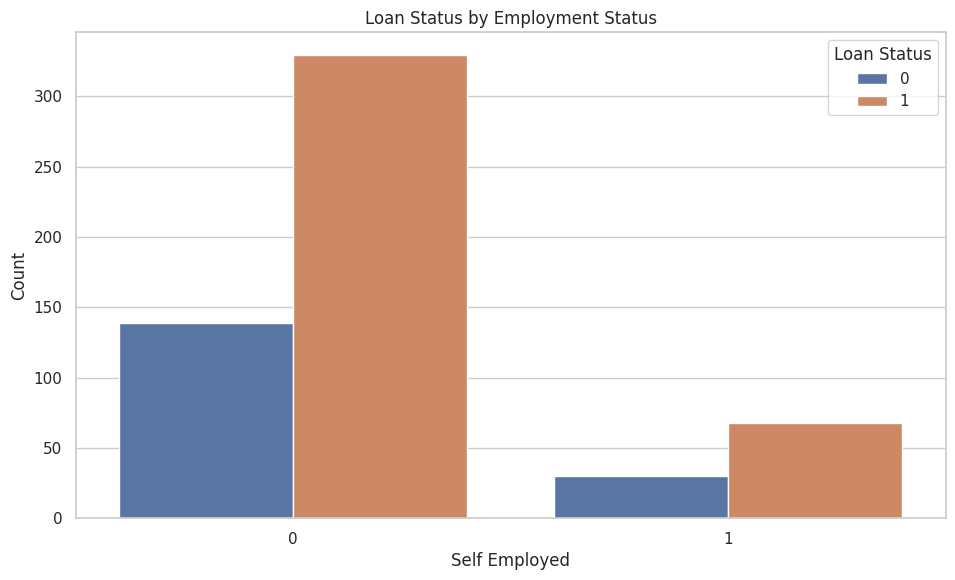

In [ ]:
# 6. Countplot for Loan Status by Employment Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=data)
plt.title('Loan Status by Employment Status')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

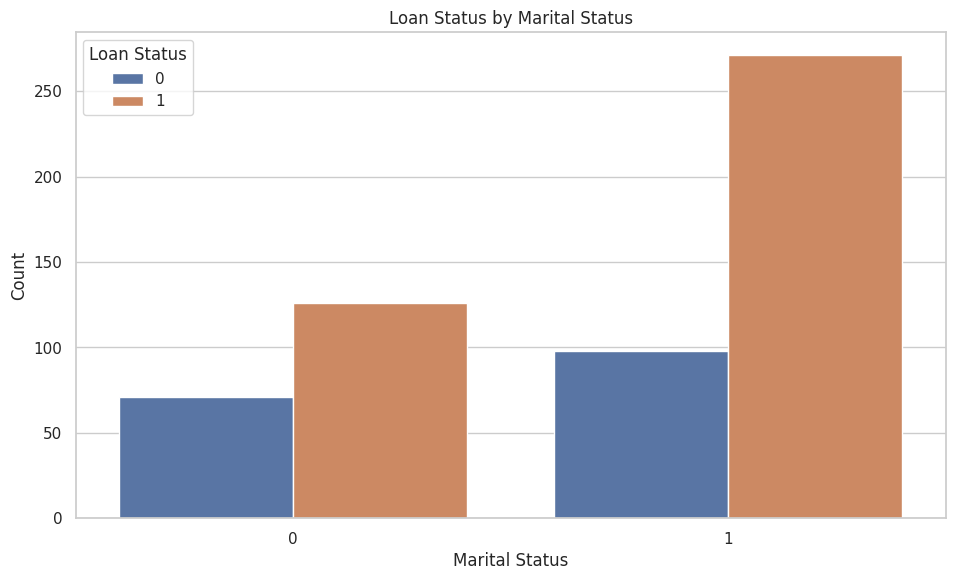

In [ ]:
# 5. Countplot for Loan Status by Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Married', hue='Loan_Status', data=data)
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

# Feature Engineering

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
# map each of the gender groups to a numerical value
gender_mapping = {"Male": 0, "Female": 1}
data['Gender'] = data['Gender'].map(gender_mapping)


In [ ]:
data['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# map each of the married groups to a numerical value
married_mapping = {"No": 0, "Yes": 1}
data['Married'] = data['Married'].map(married_mapping)

In [ ]:
data['Dependents'] = data['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3})

In [ ]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
data['Education']=data['Education'].replace({'Graduate':1, 'Not Graduate':0})

In [ ]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['Self_Employed']=data['Self_Employed'].replace({'No':0, 'Yes':1})

In [ ]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].replace({'12':0, '36':1,'60':2,'84':3,'120':4,'180':5,'240':6,'300':7,'360':8,'480':9})

In [ ]:
data['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [ ]:
data['Property_Area'] = data['Property_Area'].replace({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

In [ ]:
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
data['Loan_Status']=data['Loan_Status'].replace({'N':0, 'Y':1})

In [ ]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


# Model Training

In [ ]:
from sklearn.model_selection import train_test_split

# Drop the Survived and PassengerId
# column from the trainset
predictors = data.drop(['Loan_Status'], axis=1)
target = data["Loan_Status"]
x_train, x_val, y_train, y_val = train_test_split(
    predictors, target, test_size=0.2, random_state=0)


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()

# Fit the training data along with its output
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)

# Find the accuracy score of the model
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)


78.95


Logistic Regression

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg.fit(x_train, y_train)

# Predict on the validation set
y_pred = logreg.predict(x_val)

# Evaluate the model
# 1. Accuracy score
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 2. Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.8509
Confusion Matrix:
[[15 16]
 [ 1 82]]


Decision Tree

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model on the training data
decision_tree.fit(x_train, y_train)

# Predict on the validation set
y_pred = decision_tree.predict(x_val)

# Evaluate the model
# 1. Accuracy score
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 2. Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 3. Classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.6404
Confusion Matrix:
[[15 16]
 [25 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.48      0.42        31
           1       0.78      0.70      0.74        83

    accuracy                           0.64       114
   macro avg       0.58      0.59      0.58       114
weighted avg       0.67      0.64      0.65       114

